**Örnek 1:**

Elimizde hayali bir şirketin Reklam verileri var. (Advertising.csv)

200 farklı pazarda yapılan TV, Radio ve Newspaper reklam harcamaları sonucu gerçekleşen Satışı (Sales) görüyoruz.

Amacımız, reklam harcamaları ile Satış miktarı arasında, varsa, bir ilişki bulmak.

Böylece gelecekte ne kadar reklam bütçesi ile tahmini olarak ne kadar satış yapabileceğimizi göreceğiz.

**Girdi Değişenleri:** Harcama Tutarları - USD (TV, Radio, Newspaper) -> Input, Features

**Çıktı Değişkeni:** Satış miktarı - Adet (Sales) -> Output, Label

$X_1: TV$

$X_2: Radio$

$X_3: Newspaper$

$y: Sales$

In [1]:
# kutuphane import

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# datayi oku

df = pd.read_csv('data/Advertising.csv')

In [3]:
# describe

df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
# head
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# input
X_1 = df.TV
X_2 = df.radio
X_3 = df.newspaper

In [6]:
# ilk degisken
X_1

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
# ilk degisken tipi
type(X_1)

pandas.core.series.Series

In [8]:
# ilk degisken sekli
X_1.shape

(200,)

In [9]:
# output
y = df.sales

In [10]:
y.shape

(200,)

In [11]:
# regresyon icin hazirlik yap

linear_regressor = LinearRegression()

In [12]:
# dataframe'lerin seklini duzenle -> output
y_r = y.values.reshape(-1, 1)

In [13]:
# orjinal datanin sekli
# satir, sutun _> 200 satir, sutun yok
y.shape

(200,)

In [14]:
# yeniden boyutlandirilmis ciktinin sekli 200 satir, 1 sutun
y_r.shape

(200, 1)

In [15]:
# dataframe'lerin seklini duzenle -> input
X_1_r = X_1.values.reshape(-1, 1)
X_2_r = X_2.values.reshape(-1, 1)
X_3_r = X_3.values.reshape(-1, 1)

In [16]:
X_1_r.shape

(200, 1)

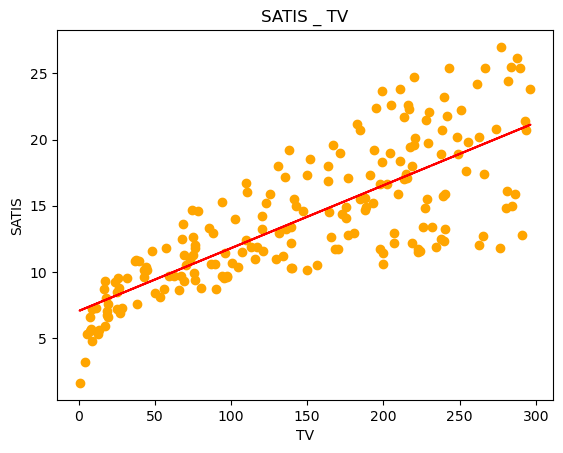

In [17]:
# SATIS _ TV

# data -> X_1
plt.scatter(X_1, y, c='orange')

# regresyon
linear_regressor.fit(X_1_r, y_r)
y_pred = linear_regressor.predict(X_1_r)
plt.plot(X_1, y_pred, c='red')

plt.xlabel('TV')
plt.ylabel('SATIS')
plt.title('SATIS _ TV')
plt.show()

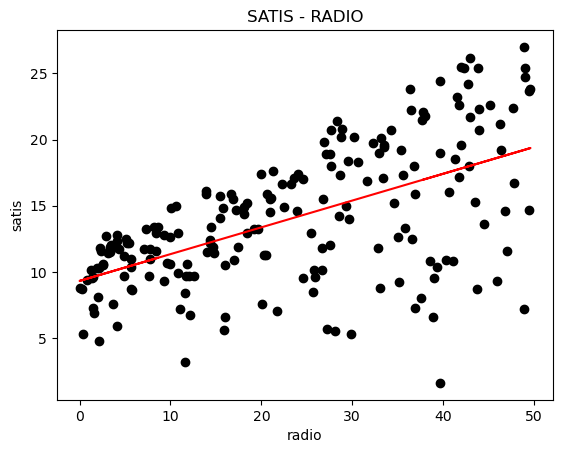

In [18]:
# SATIS _ RADIO

# data _ X_2
plt.scatter(X_2, y, color='black')

linear_regressor.fit(X_2_r, y_r)
y_pred_2 = linear_regressor.predict(X_2_r)
plt.plot(X_2, y_pred_2, c='r')

# grafigi formatla
plt.xlabel('radio')
plt.ylabel('satis')
plt.title('SATIS - RADIO')
plt.show()

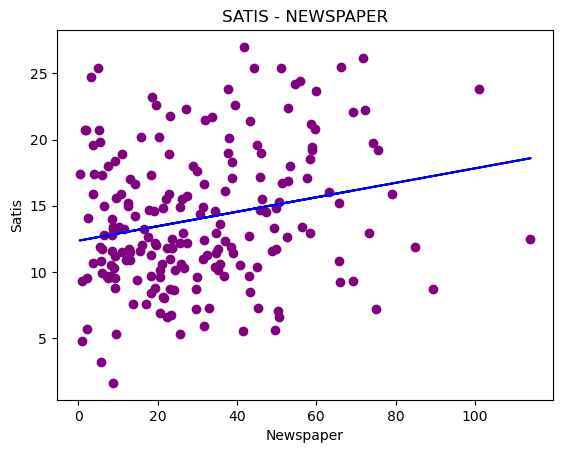

In [19]:
# SATIS _ NEWSPAPER

# data _> X_3

plt.scatter(X_3, y, c='purple')

linear_regressor.fit(X_3_r, y_r)
y_pred_3 = linear_regressor.predict(X_3_r)
plt.plot(X_3, y_pred_3, c='blue')

plt.xlabel('Newspaper')
plt.ylabel('Satis')
plt.title('SATIS - NEWSPAPER')
plt.show()

Genel olarak şöyle düşünelim:

Y ile X arasında şu şekilde bir ilişki olduğunu kabul edelim:

$$Y = f(X) + \epsilon$$

Burada:

**$f()$** : Ne olduğu bilinmeyen bir fonksiyon.

**$\epsilon$** : Rasgele hata miktarı (error term) -> ölçüm hatası, insan hatası vs.

---

**Örnek 2:**

Gelir ile Eğitim Düzeyi arasındaki ilişkiye bakalım şimdi.

Elimizde 30 çalışana ait Gelir (Income) ve Eğitim Yılı (Education) bilgisi var.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
income = pd.read_csv('data/Income.csv')

In [22]:
income.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [23]:
# input
X = income.Education

In [24]:
# output
y = income.Income

In [25]:
# reshape df
X_r = X.values.reshape(-1, 1)
y_r = y.values.reshape(-1, 1)

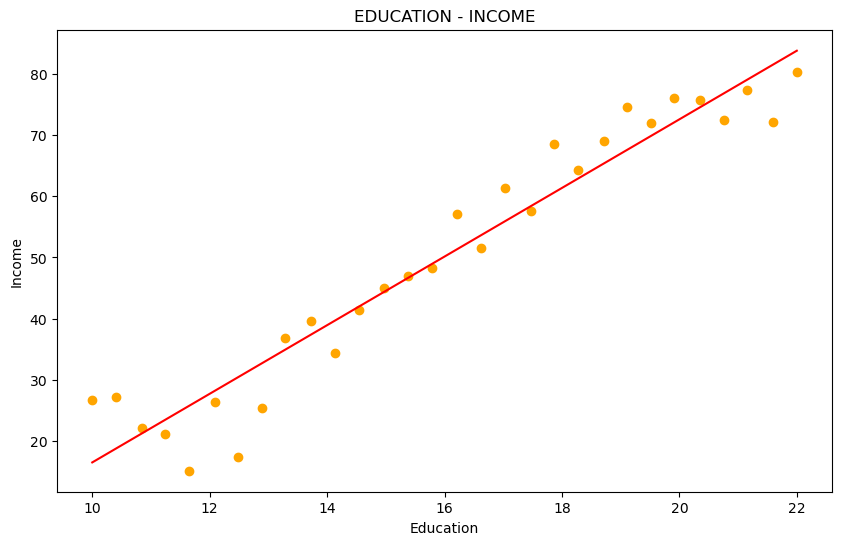

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange')

model = LinearRegression()
model.fit(X_r, y_r)
y_pred = model.predict(X_r)

plt.plot(X, y_pred, c='r')

plt.xlabel('Education')
plt.ylabel('Income')
plt.title('EDUCATION - INCOME')
plt.show()

Gördüğünüz gibi doğrusal bir çizgi (Lineer Regression) çizdiğimiz için çok oturmadı veriye.

Eğer daha yüksek dereceli (4. derece) bir Polinom olarak modelleseydik:

<img src='images/quadratik.jpg' />

Bu sefer başka bir fonksiyon görüyoruz. Biraz daha güzel oturdu veriye.

Ama hala tam olarak **f** bilmiyoruz.

Aslında,

Makine Öğrenmesi **f** ye yaklaşmak için (hiçbir zaman bilemeyiz çünkü) geliştirilmiş algoritmalardır.

Eğer **f**'yi bilmiyorsak, o zaman tahmin etmeye çalışacağız.

**İşte bu, tahmin yapıp, bilmediğimiz f'ye yaklaşma çabasına `Öğrenme` diyoruz.**